In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.csv')
print(data.head(2))
print(data.tail(3))

   y  x1  x2
0  2   4  -1
1  3   5  -2
   y  x1  x2
2  4   9  -2
3  5  11  -3
4  6  10  -4


In [ ]:
print(data.loc[:,'y'])
print(type(data.loc[:,'y']))
print(data['y'])
print(type(data['y']))

0    2
1    3
2    4
3    5
4    6
Name: y, dtype: int64
<class 'pandas.core.series.Series'>
0    2
1    3
2    4
3    5
4    6
Name: y, dtype: int64
<class 'pandas.core.series.Series'>


In [ ]:
print(data.loc[:,'y':'x1'])
print(type(data.loc[:,'y':'x1']))
print(data[['y', 'x1']])
print(type(data[['y', 'x1']]))
sub_df = data.loc[:,'y':'x1']
print(sub_df)

   y  x1
0  2   4
1  3   5
2  4   9
3  5  11
4  6  10
<class 'pandas.core.frame.DataFrame'>
   y  x1
0  2   4
1  3   5
2  4   9
3  5  11
4  6  10
<class 'pandas.core.frame.DataFrame'>
   y  x1
0  2   4
1  3   5
2  4   9
3  5  11
4  6  10


In [ ]:
#gradient descent threes parameters
b0 = 0
b1 = 0
b2 = 0

#learning rate
learning_rate = 0.001
epochs = 50000

n = len(data.index)

#gradient descent loop
for index in range(epochs):
  y_pred = b0 + b1*data['x1'] + b2*data['x2']

  d_b0 = -2/n * np.sum(data['y'] - y_pred)
  d_b1 = -2/n * np.sum(data['x1']*(data['y'] - y_pred))
  d_b2 = -2/n * np.sum(data['x2']*(data['y'] - y_pred))

  #update the parameters
  b0 -= learning_rate * d_b0
  b1 -= learning_rate * d_b1
  b2 -= learning_rate * d_b2

print('After {} epochs.'.format(index + 1))
print('b0 = {:.4f}'.format(b0))
print('b1 = {:.4f}'.format(b1))
print('b2 = {:.4f}'.format(b2))

Después de 50000 epochs.
b0 = 0.2813
b1 = 0.1922
b2 = -0.9248


In [ ]:
#residuals testing
print(y_pred)
print(data['y'])
residuals = y_pred - data['y']
sum_res_2 = np.dot(residuals.T, residuals)#transpose for dot product
print(sum_res_2)

0    1.974929
1    3.091921
2    3.860724
3    5.169917
4    5.902508
dtype: float64
0    2
1    3
2    4
3    5
4    6
Name: y, dtype: int64
0.06685236769417616


In [ ]:
#prepare the data set for StatModels
X = np.array([data['x1'], data['x2']]).T
Y = np.array(data['y']).reshape(-1,1)
print(X)
print(Y)

[[ 4 -1]
 [ 5 -2]
 [ 9 -2]
 [11 -3]
 [10 -4]]
[[2]
 [3]
 [4]
 [5]
 [6]]


In [ ]:
#Let's check if StatModels estimates the same parameters
X = sm.add_constant(X)
lin_model = sm.OLS(Y,X)
result = lin_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     148.6
Date:                Fri, 09 Jul 2021   Prob (F-statistic):            0.00669
Time:                        00:36:52   Log-Likelihood:                 3.6921
No. Observations:                   5   AIC:                            -1.384
Df Residuals:                       2   BIC:                            -2.556
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2813      0.244      1.155      0.3

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


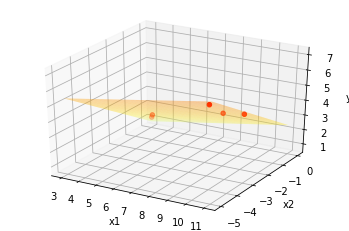

In [ ]:
#Let's graph the plane that represents the regression
def regresion(x1, x2, b0, b1, b2):
  return b0 + b1*x1 + b2*x2

x1 = np.linspace(3,11,30)
x2 = np.linspace(-5,0,30)

X1, X2 = np.meshgrid(x1, x2)
Y = regresion(X1, X2, b0, b1, b2)

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.scatter(data['x1'], data['x2'], data['y'], c = 'red', marker = 'o')
ax.plot_surface(X1, X2, Y, cmap = 'Wistia', alpha = 0.4)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.show()